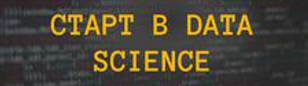

# Старт в Data Science!

### Описание курса

Главной целью этого курса является обучение слушателей основам Python и аналитики - для последующей успешной карьеры в области анализа данных. Также слушатели познакомятся с инструментом Streamlit для создания красивых интерактивных сервисов и дашбордов.

Курс проводится командой магистратуры "Машинное обучение и высоконагруженные системы" факультета компьютерных наук ВШЭ.

## Итоговый проект

# Анализ зарплат в России

В проекте используются открытые данные из официальных источников:

[Сайт Росстата](https://rosstat.gov.ru/)

[Таблицы уровня инфляции в России](https://уровень-инфляции.рф/)

<a id="0"></a>
## Содержание

1. [Импорт библиотек и данных](#1)
2. [Среднемесячная номинальная начисленная заработная плата работников по отраслям](#2)
3. [Инфляция](#3)
4. [Реальная среднемесячная заработная плата с учетом инфляции](#4) 
5. [Сравнение номинальной и реальной заработной платы](#5)
6. [Динамика изменения заработной платы](#6)
7. [Индексы валового внутреннего продукта ВВП](#7)
8. [Индекс производительности труда](#8)
9. [Сравнение заработной платы с индексами производительности труда и ВВП](#9)
10. [Выводы](#10)


<a id="1"></a>

# 1. Импорт библиотек и данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# задание пути к проекту
%cd F:\py\edu\2402 ВШЭ - Марафон Старт в Data Science\project

F:\py\edu\2402 ВШЭ - Марафон Старт в Data Science\project


Данные по заработной плате получены из таблицы "Среднемесячная номинальная начисленная заработная плата работников в целом по экономике по субъектам Российской Федерации за 2000-2023 гг." https://rosstat.gov.ru/storage/mediabank/tab3-zpl_2023.xlsx

Данные об уровне инфляции в стране получены с сайта [https://уровень-инфляции.рф/](https://уровень-инфляции.рф/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)

Валовой внутренний продукт, ВВП годы (с 1995 г.) https://rosstat.gov.ru/storage/mediabank/VVP_god_s_1995.xlsx

ВВП на душу населения https://rosstat.gov.ru/storage/mediabank/VVP_na_dushu_s_1995.xlsx

Индекс производительности труда https://rosstat.gov.ru/storage/mediabank/Index_proizv_truda(06102023).xlsx

In [3]:
df = pd.read_csv('data.csv', sep=';') 
df.head()

,Год,Инфляция,Всего по экономике,"Сельское и лесное хозяйство, охота",Добыча топливно-энергетических полезных ископаемых,Связь,Образование
0,2000,20.20,2223,985,6985,2879,1240
1,2001,18.58,3240,1435,10905,4131,1833
2,2002,15.06,4360,1876,13080,5662,2927
3,2003,11.99,5499,2340,16136,7304,3387
4,2004,11.74,6740,3015,19903,8974,4203


In [4]:
# Индексы физического объема валового внутреннего продукта
# (в процентах к предыдущему году)
df_vvp = pd.read_csv('vvp_index.csv', sep=';')
df_vvp.head()

,Год,Индекс ВВП
0,2000,110.0
1,2001,105.1
2,2002,104.7
3,2003,107.3
4,2004,107.2


In [5]:
# Индексы физического объема валового внутреннего продукта на душу населения
# (в процентах к предыдущему году)
df_vvp_nd = pd.read_csv('vvp_index_dn.csv', sep=';')
df_vvp_nd.head()

,Год,Индекс ВВП на душу населения
0,2000,110.5
1,2001,105.5
2,2002,105.2
3,2003,107.8
4,2004,107.6


In [6]:
# Индекс производительности труда в экономике Российской Федерации в 2003-2022 гг.
# (в % к предыдущему году)
df_ipt = pd.read_csv('ipt.csv', sep=';')
df_ipt.head()

,Год,В целом по экономике,Сельское и лесное хозяйство. охота,Добыча полезных ископаемых,Транспорт и связь
0,2003,107.0,105.6,109.2,107.5
1,2004,106.5,102.9,107.3,108.7
2,2005,105.5,101.8,106.3,102.1
3,2006,107.5,104.3,103.3,110.7
4,2007,107.5,105.0,103.1,107.5


<a id="2"></a>
[Содержание](#0)

# 2. Среднемесячная номинальная начисленная заработная плата работников по отраслям

In [ ]:
# Графическое представление
columns_to_plot = df.columns[-5:]  # выбираем последние 5 колонок
plt.figure(figsize=(12, 5))
for column in columns_to_plot:
    plt.plot(df['Год'], df[column], marker='o', label=column)

plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Среднемесячная номинальная начисленная заработная плата работников по отраслям')
plt.legend()
plt.grid()
plt.show()

#### Наблюдается значительное расслоение уровня зарплат по отраслям.

<a id="3"></a>
[Содержание](#0)

# 3. Инфляция 

In [ ]:
# Определяем данные для графика инфляции
plt.figure(figsize=(12, 3))
plt.plot(df['Год'], df['Инфляция'], marker='o', label='Инфляция')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Инфляция')
plt.title('Инфляция по годам')
plt.legend()
plt.grid()
plt.show()

Посчитаем суммарную инфляцию относительно 2000 года

In [ ]:
# Посчитаем суммарную инфляцию относительно 2000 года
df1 = pd.DataFrame() 
df1[['Год', 'Инфляция']] = df[['Год', 'Инфляция']]
df1['Суммарная инфляция'] = df['Инфляция'].cumsum()
df1

In [ ]:
# Определяем нужные данные для графика
plt.figure(figsize=(12, 5))
plt.plot(df['Год'], df1['Инфляция'], marker='o', label='Инфляция')
plt.plot(df['Год'], df1['Суммарная инфляция'], marker='o', label='Суммарная инфляция')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Инфляция')
plt.title('Инфляция по годам')
plt.legend()
plt.grid()
plt.show()

<a id="4"></a>
[Содержание](#0)

# 4. Реальная среднемесячная заработная плата с учетом инфляции

In [ ]:
# Создаем новый датафрейм с реальной зарплатой с учетом инфляции
df_real_salary = df.copy()

for column in df.columns[-5:]:
    df_real_salary[column] = (df_real_salary[column] / (1 + df['Инфляция'] / 100)).astype(int)

df_real_salary.head()

In [ ]:
# Графическое представление
columns_to_plot = df_real_salary.columns[-5:]  # выбираем последние 5 колонок
plt.figure(figsize=(12, 5))
for column in columns_to_plot:
    plt.plot(df_real_salary['Год'], df_real_salary[column], marker='o', label=column)

plt.xlabel('Год')
plt.ylabel('Реальная заработная плата')
plt.title('Среднемесячная номинальная начисленная заработная плата работников по отраслям с учетом инфляции')
plt.legend()
plt.grid()
plt.show()

<a id="5"></a>
[Содержание](#0)

# 5. Сравнение номинальной и реальной заработной платы

In [ ]:
plt.plot(df['Год'], df['Всего по экономике'], marker='o', label='Номинальная ЗП')
plt.plot(df_real_salary['Год'], df_real_salary['Всего по экономике'], marker='o', label='Реальная ЗП')

plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Среднемесячная заработная плата - Всего по экономике')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(df['Год'], df['Добыча топливно-энергетических полезных ископаемых'], marker='o', label='Номинальная ЗП')
plt.plot(df_real_salary['Год'], df_real_salary['Добыча топливно-энергетических полезных ископаемых'], marker='o', label='Реальная ЗП')

plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Среднемесячная заработная плата - Добыча топливно-энергетических полезных ископаемых')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(df['Год'], df['Сельское и лесное хозяйство, охота'], marker='o', label='Номинальная ЗП')
plt.plot(df_real_salary['Год'], df_real_salary['Сельское и лесное хозяйство, охота'], marker='o', label='Реальная ЗП')

plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Среднемесячная заработная плата - Сельское и лесное хозяйство, охота')
plt.legend()
plt.grid()
plt.show()

#### Реальная зарплата ниже номинальной на уровень инфляции

<a id="6"></a>
[Содержание](#0)

# 6. Динамика изменения заработной платы

In [ ]:
# Посчитаем процент изменения зарплаты относительно предыдущего года
df2 = pd.DataFrame() 
df2[['Год', 'Инфляция']] = df[['Год', 'Инфляция']]
for col in df.columns[2:]:
    df2[col+' % изменения'] = (df[col].pct_change() * 100).round(2)
df2.fillna(value=0, inplace=True)
df2

In [ ]:
# Графическое представление
plt.figure(figsize=(12, 6))
columns_to_plot = df2.columns[-5:]  # выбираем последние 5 колонок
plt.plot(df2['Год'], df2['Инфляция'], color='black', label='Инфляция')
for column in columns_to_plot:
    plt.plot(df2['Год'], df2[column], marker='o', label=column)

plt.xlabel('Год')
plt.ylabel('Заработная плата, в % к предыдущему году')
plt.title('Динамика изменения заработной платы, в % к предыдущему году')
plt.legend()
plt.grid()
plt.show()

Рассмотрим подробнее некоторые отрасли 

In [ ]:
# Графическое представление
plt.figure(figsize=(12, 4))
plt.plot(df2['Год'], df2['Инфляция'], color='black', label='Инфляция')
plt.plot(df2['Год'], df2['Всего по экономике % изменения'], marker='o', label='Всего по экономике, % изменения')
plt.plot(df2['Год'], df2['Сельское и лесное хозяйство, охота % изменения'], color='red', marker='o', label='Сельское и лесное хозяйство, охота % изменения')

plt.xlabel('Год')
plt.ylabel('Заработная плата, в % к предыдущему году')
plt.title('Динамика изменения заработной платы в сельском хозяйстве, в % к предыдущему году')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Графическое представление
plt.figure(figsize=(12, 4))
plt.plot(df2['Год'], df2['Инфляция'], color='black', label='Инфляция')
plt.plot(df2['Год'], df2['Всего по экономике % изменения'], marker='o', label='Всего по экономике, % изменения')
plt.plot(df2['Год'], df2['Добыча топливно-энергетических полезных ископаемых % изменения'], color='red', marker='o', label='Добыча топливно-энергетических полезных ископаемых % изменения')

plt.xlabel('Год')
plt.ylabel('Заработная плата, в % к предыдущему году')
plt.title('Динамика изменения заработной платы в добыче топливно-энергетических полезных ископаемых, в % к предыдущему году')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Графическое представление
plt.figure(figsize=(12, 4))
plt.plot(df2['Год'], df2['Инфляция'], color='black', label='Инфляция')
plt.plot(df2['Год'], df2['Всего по экономике % изменения'], marker='o', label='Всего по экономике, % изменения')
plt.plot(df2['Год'], df2['Связь % изменения'], color='red', marker='o', label='Связь % изменения')

plt.xlabel('Год')
plt.ylabel('Заработная плата, в % к предыдущему году')
plt.title('Динамика изменения заработной платы в Связи, в % к предыдущему году')
plt.legend()
plt.grid()
plt.show()

#### Прирост зарплаты существенно снизился

<a id="7"></a>
[Содержание](#0)

# 7. Индексы валового внутреннего продукта ВВП

### Индексы физического объема валового внутреннего продукта
(в процентах к предыдущему году)

In [ ]:
# Индексы физического объема валового внутреннего продукта
# (в процентах к предыдущему году)
df_vvp = pd.read_csv('vvp_index.csv', sep=';')

In [ ]:
# Определяем нужные данные для графика
plt.figure(figsize=(12, 3))
plt.plot(df_vvp['Год'], df_vvp['Индекс ВВП'], marker='o', label='Индекс ВВП')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Индекс ВВП')
plt.title('Индексы физического объема валового внутреннего продукта (в процентах к предыдущему году)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_vvp.head()

### Индексы физического объема валового внутреннего продукта на душу населения
(в процентах к предыдущему году)

In [ ]:
# Индексы физического объема валового внутреннего продукта на душу населения
# (в процентах к предыдущему году)
df_vvp2 = pd.read_csv('vvp_index_dn.csv', sep=';')

In [ ]:
# Определяем нужные данные для графика
plt.figure(figsize=(12, 3))
plt.plot(df_vvp2['Год'], df_vvp2['Индекс ВВП на душу населения'], marker='o', label='Индекс ВВП на душу населения')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Индекс ВВП')
plt.title('Индексы физического объема валового внутреннего продукта на душу населения (в процентах к предыдущему году)')
plt.legend()
plt.grid()
plt.show()

Красным выделен индекс ВВП менее 100%

In [ ]:
plt.figure(figsize=(12, 3))
colors = ['red' if val < 100 else 'green' for val in df_vvp2['Индекс ВВП на душу населения']]
plt.grid()
plt.bar(df_vvp2['Год'], df_vvp2['Индекс ВВП на душу населения'], color=colors)
plt.xlabel('Год')
plt.ylabel('Индекс ВВП')
plt.ylim(80, 120)  # Установка интервала оси y от 90 до 115
plt.title('Индексы физического объема валового внутреннего продукта на душу населения (в процентах к предыдущему году)')

plt.show()

In [ ]:
df_vvp.columns

In [ ]:
plt.figure(figsize=(12, 4))
bar_width = 0.4
index = df_vvp['Год']
plt.bar(index - 0.5*bar_width, df_vvp['Индекс ВВП'], bar_width, color='blue', label='Индекс физического объема ВВП')
plt.bar(index + 0.5*bar_width, df_vvp2['Индекс ВВП на душу населения'], bar_width, color='green', label='Индекс ВВП на душу населения')

plt.xlabel('Год')
plt.ylabel('Индексы')
plt.title('Сравнение индексов ВВП')
plt.legend()
plt.xticks(index, rotation=45)
plt.ylim(85, 115)
plt.show()

In [ ]:
df_vvp2.head()

<a id="8"></a>
[Содержание](#0)

# 8. Индекс производительности труда

### Индекс производительности труда в экономике Российской Федерации в 2003-2022 гг.
(в % к предыдущему году)

In [ ]:
# Индекс производительности труда в экономике Российской Федерации в 2003-2022 гг.
# (в % к предыдущему году)
df_ipt = pd.read_csv('ipt.csv', sep=';')
df_ipt

In [ ]:
# Графическое представление
columns_to_plot = df_ipt.columns[-4:]  # выбираем последние 4 колонок
plt.figure(figsize=(12, 5))
for column in columns_to_plot:
    plt.plot(df_ipt['Год'], df_ipt[column], marker='o', label=column)

plt.xlabel('Год')
plt.ylabel('Индекс производительности труда')
plt.title('Индекс производительности труда в экономике Российской Федерации в 2003-2022 гг.')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Те же данные, но вид сбоку )
plt.figure(figsize=(12, 4))
bar_width = 0.2
index = df_ipt['Год']
plt.bar(index - 1.5*bar_width, df_ipt['В целом по экономике'], bar_width, color='blue', label='В целом по экономике')
plt.bar(index - 0.5*bar_width, df_ipt['Сельское и лесное хозяйство. охота'], bar_width, color='green', label='Сельское и лесное хозяйство. охота')
plt.bar(index + 0.5*bar_width, df_ipt['Добыча полезных ископаемых'], bar_width, color='orange', label='Добыча полезных ископаемых')
plt.bar(index + 1.5*bar_width, df_ipt['Транспорт и связь'], bar_width, color='red', label='Транспорт и связь')
plt.xlabel('Год')
plt.ylabel('Индекс производительности труда')
plt.title('Индекс производительности труда в экономике Российской Федерации в 2003-2022 гг.')
plt.legend()
plt.xticks(index, rotation=45)
plt.ylim(80, 120)
plt.show()

<a id="9"></a>
[Содержание](#0)

# 9. Сравнение заработной платы с индексами производительности труда и ВВП

In [ ]:
df_pt = df_ipt.add_prefix('pt_')
df_zp = df.add_prefix('zp_')
df_2003 = pd.merge(df_pt, df_zp, left_on='pt_Год', right_on='zp_Год')
df_2003 = pd.merge(df_2003, df_vvp, left_on='pt_Год', right_on='Год')
df_2003.head()

In [ ]:
# Определяем нужные данные для графика
plt.figure(figsize=(12, 5))
plt.plot(df_2003['pt_Год'], df_2003['pt_В целом по экономике']*500, marker='o', color='blue', label='Уровень производительности труда в целом по экономике')
plt.plot(df_2003['zp_Год'], df_2003['zp_Всего по экономике'], marker='o', label='Зарплата всего по экономике')
plt.plot(df_2003['Год'], df_2003['Индекс ВВП']*500, marker='o', label='Уровень индекса ВВП')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Сравнение заработной платы с индексами производительности труда и ВВП')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Определяем нужные данные для графика
plt.figure(figsize=(12, 5))
plt.plot(df_2003['pt_Год'], df_2003['pt_Сельское и лесное хозяйство. охота']*500, marker='o', color='blue', label='Уровень производительности труда в Сельском и лесном хозяйстве')
plt.plot(df_2003['zp_Год'], df_2003['zp_Сельское и лесное хозяйство, охота'], marker='o', label='Зарплата в Сельском и лесном хозяйстве')
plt.plot(df_2003['Год'], df_2003['Индекс ВВП']*500, marker='o', label='Уровень индекса ВВП')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Сравнение заработной платы с индексами производительности труда и ВВП')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Определяем нужные данные для графика
plt.figure(figsize=(12, 5))
plt.plot(df_2003['pt_Год'], df_2003['pt_Добыча полезных ископаемых']*500, marker='o', color='blue', label='Уровень производительности труда в Добыче полезных ископаемых')
plt.plot(df_2003['zp_Год'], df_2003['zp_Добыча топливно-энергетических полезных ископаемых'], marker='o', label='Зарплата в Добыче топливно-энергетических полезных ископаемых')
plt.plot(df_2003['Год'], df_2003['Индекс ВВП']*500, marker='o', label='Уровень индекса ВВП')

# Добавляем оформление графика
plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.title('Сравнение заработной платы с индексами производительности труда и ВВП')
plt.legend()
plt.grid()
plt.show()

<a id="10"></a>
[Содержание](#0)

# 10. Выводы

#### - Наблюдается значительное расслоение уровня зарплат по отраслям.

#### - Рост уровня зарплат опережает официальную инфляцию, но постепенно снижается.
#### - Рост уровня зарплат по всей видимости, не связан с ростом производительности труда.

#### - Наблюдается тренды к снижению:    
    - уровня инфляции, 
    - прироста ВВП на душу населения, 
    - темпов роста производительность труда

#### - Сравнение данных Росстата со своей персональной зарплатой вызывает недоверие к статистике как науке. )